# Logistic Regression Comprehensive Demo

This notebook demonstrates:
- Basic logistic regression implementation
- Threshold tuning for classification
- Classification metrics evaluation
- Cost curves visualization
- Handling imbalanced datasets

**Target Audience:** Beginners in Machine Learning

**Dataset:** Titanic Survival Prediction (predicting if a passenger survived based on their characteristics)


## 1. Import Required Libraries

We'll use scikit-learn for machine learning, pandas for data manipulation, numpy for numerical operations, and matplotlib/seaborn for visualization.


In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [2]:
# Import metrics and visualization tools
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, roc_curve, auc,
                             precision_recall_curve, classification_report,
                             roc_auc_score)
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
sns.set_palette("husl")


## 2. Load and Explore the Dataset

We'll use the famous Titanic dataset to predict passenger survival. This is a classic binary classification problem.


In [3]:
# Load Titanic dataset from seaborn (built-in dataset)
df = sns.load_dataset('titanic')

# Display first few rows
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())
print("\nData types:")
print(df.dtypes)


Missing values per column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Data types:
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


In [5]:
# Select features for modeling
# We'll use: age, fare, sex, class, and number of siblings/spouses
features = ['age', 'fare', 'sex', 'class', 'sibsp']

# Create feature matrix X
X = df[features].copy()


In [6]:
# Create target variable (survived: 0 = No, 1 = Yes)
y = df['survived'].copy()

# Display class distribution
print("Class distribution:")
print(y.value_counts())
print(f"\nSurvival rate: {y.mean():.2%}")


Class distribution:
survived
0    549
1    342
Name: count, dtype: int64

Survival rate: 38.38%


In [7]:
# Handle missing values: fill age with median
X['age'].fillna(X['age'].median(), inplace=True)

# Handle missing values: fill fare with median
X['fare'].fillna(X['fare'].median(), inplace=True)


## 3. Preprocess Data

We need to convert categorical variables to numerical format for logistic regression.


In [8]:
# Convert categorical variables to numerical
# Sex: male=0, female=1
X['sex'] = X['sex'].map({'male': 0, 'female': 1})


In [9]:
# Convert class to numerical (First=1, Second=2, Third=3)
X['class'] = X['class'].map({'First': 1, 'Second': 2, 'Third': 3})

# Display processed features
print("Processed features:")
X.head()


Processed features:


,age,fare,sex,class,sibsp
0,22.0,7.2500,0,3,1
1,38.0,71.2833,1,1,1
2,26.0,7.9250,1,3,0
3,35.0,53.1000,1,1,1
4,35.0,8.0500,0,3,0


## 4. Split Data into Training and Testing Sets

We split the data to evaluate model performance on unseen data. Using stratify ensures both sets have similar class distributions.

In [10]:
# Split data: 80% training, 20% testing
# stratify=y ensures similar class distribution in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [11]:
# Check split sizes and class distribution
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nTraining survival rate: {y_train.mean():.2%}")
print(f"Test survival rate: {y_test.mean():.2%}")


Training set: 712 samples
Test set: 179 samples

Training survival rate: 38.34%
Test survival rate: 38.55%


## 5. Train Logistic Regression Model

Logistic regression predicts probabilities. We'll use default threshold (0.5) initially, then tune it later.


### 5.1 Create and Train the Model

In [12]:
# Create logistic regression model
# max_iter ensures convergence, random_state for reproducibility
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on training data
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### 5.2 Make Predictions

Logistic regression outputs probabilities. We convert them to binary predictions using a threshold.


In [13]:
# Get predicted probabilities (probability of survival)
# [:, 1] selects probability of class 1 (survived)
y_proba = model.predict_proba(X_test)[:, 1]

# Get binary predictions using default threshold (0.5)
y_pred = model.predict(X_test)


In [14]:
# Display some example predictions
print("Sample predictions (first 10):")
print(f"Probabilities: {y_proba[:10]}")
print(f"Binary predictions: {y_pred[:10]}")
print(f"Actual labels: {y_test.values[:10]}")


Sample predictions (first 10):
Probabilities: [0.07216288 0.05965729 0.12585755 0.03791878 0.53463649 0.45936672
 0.76586105 0.34688516 0.30001079 0.17187761]
Binary predictions: [0 0 0 0 1 0 1 0 0 0]
Actual labels: [0 0 1 0 1 1 1 0 0 0]


## 6. Classification Metrics

Metrics help us understand model performance. Different metrics are important for different scenarios.


### 6.1 Confusion Matrix

The confusion matrix shows true positives, true negatives, false positives, and false negatives.


In [15]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(cm)
print("\nFormat: [TN, FP]")
print("        [FN, TP]")


Confusion Matrix:
[[95 15]
 [20 49]]

Format: [TN, FP]
        [FN, TP]


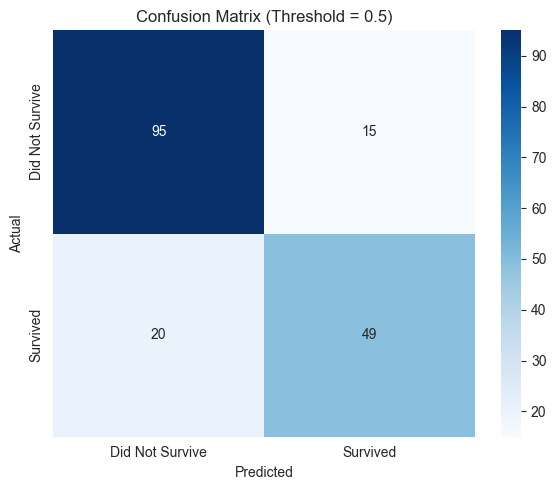

In [16]:
# Visualize confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Did Not Survive', 'Survived'], 
            yticklabels=['Did Not Survive', 'Survived'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.5)')
plt.tight_layout()
plt.show()


### 6.2 Basic Classification Metrics

- **Accuracy**: Overall correctness (can be misleading with imbalanced data)
- **Precision**: Of predicted positives, how many are actually positive?
- **Recall**: Of actual positives, how many did we catch?
- **F1-Score**: Harmonic mean of precision and recall


In [17]:
# Calculate key metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1:.4f}")


Accuracy:  0.8045
Precision: 0.7656
Recall:    0.7101
F1-Score:  0.7368


In [18]:
# Detailed classification report
print(classification_report(y_test, y_pred, 
                          target_names=['Did Not Survive', 'Survived']))


                 precision    recall  f1-score   support

Did Not Survive       0.83      0.86      0.84       110
       Survived       0.77      0.71      0.74        69

       accuracy                           0.80       179
      macro avg       0.80      0.79      0.79       179
   weighted avg       0.80      0.80      0.80       179



## 7. Threshold Tuning

The default threshold is 0.5, but this may not be optimal. Different thresholds balance precision and recall differently.

**Edge Case**: When classes are imbalanced, default threshold often favors the majority class.


### 7.1 Understanding Threshold Impact

Lower threshold → More positive predictions → Higher recall, Lower precision
Higher threshold → Fewer positive predictions → Lower recall, Higher precision


In [19]:
# Test different thresholds
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

# Store results for each threshold
results = []

for threshold in thresholds:
    # Convert probabilities to binary predictions
    y_pred_thresh = (y_proba >= threshold).astype(int)
    
    # Calculate metrics
    acc = accuracy_score(y_test, y_pred_thresh)
    prec = precision_score(y_test, y_pred_thresh)
    rec = recall_score(y_test, y_pred_thresh)
    f1_val = f1_score(y_test, y_pred_thresh)
    
    results.append({
        'threshold': threshold,
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1_val
    })


In [20]:
# Display results as DataFrame
results_df = pd.DataFrame(results)
print("Metrics at Different Thresholds:")
print(results_df.round(4))


Metrics at Different Thresholds:
   threshold  accuracy  precision  recall      f1
0        0.3    0.7709     0.6707  0.7971  0.7285
1        0.4    0.8101     0.7397  0.7826  0.7606
2        0.5    0.8045     0.7656  0.7101  0.7368
3        0.6    0.8045     0.8542  0.5942  0.7009
4        0.7    0.7765     0.9394  0.4493  0.6078


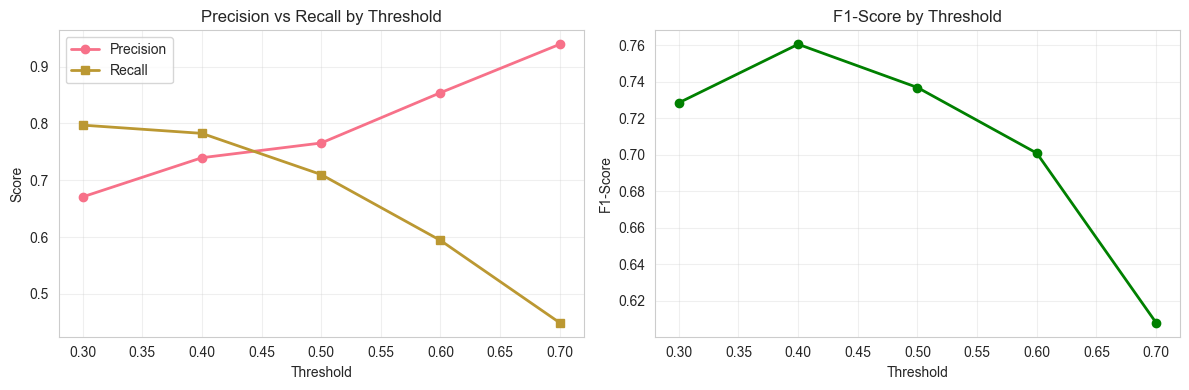

In [21]:
# Visualize threshold impact
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot 1: Precision and Recall
axes[0].plot(results_df['threshold'], results_df['precision'], 
             'o-', label='Precision', linewidth=2)
axes[0].plot(results_df['threshold'], results_df['recall'], 
             's-', label='Recall', linewidth=2)
axes[0].set_xlabel('Threshold')
axes[0].set_ylabel('Score')
axes[0].set_title('Precision vs Recall by Threshold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: F1-Score
axes[1].plot(results_df['threshold'], results_df['f1'], 
             'o-', color='green', linewidth=2)
axes[1].set_xlabel('Threshold')
axes[1].set_ylabel('F1-Score')
axes[1].set_title('F1-Score by Threshold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


### 7.2 Finding Optimal Threshold

We can use F1-score or Youden's J statistic to find the optimal threshold.


In [22]:
# Find threshold that maximizes F1-score
# Test many thresholds between 0 and 1
test_thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = []

for thresh in test_thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))


In [23]:
# Find optimal threshold (maximizes F1-score)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = test_thresholds[optimal_idx]
optimal_f1 = f1_scores[optimal_idx]

print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Optimal F1-score: {optimal_f1:.4f}")


Optimal threshold: 0.420
Optimal F1-score: 0.7660


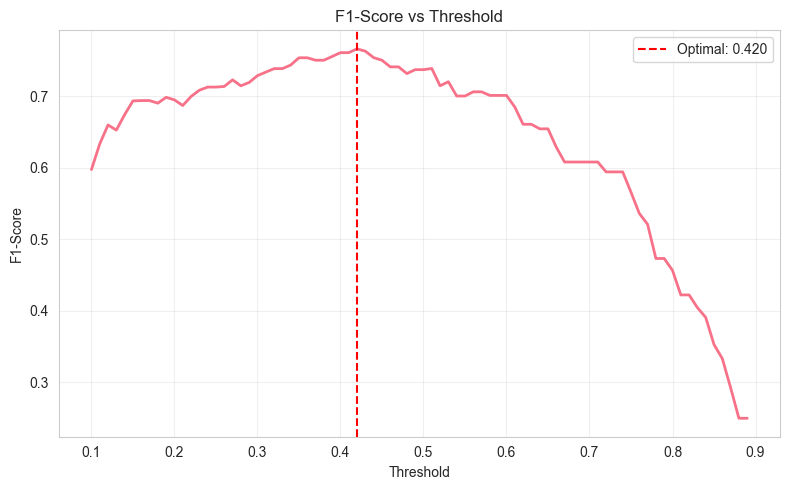

In [24]:
# Visualize F1-score across all thresholds
plt.figure(figsize=(8, 5))
plt.plot(test_thresholds, f1_scores, linewidth=2)
plt.axvline(optimal_threshold, color='red', linestyle='--', 
            label=f'Optimal: {optimal_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('F1-Score')
plt.title('F1-Score vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [25]:
# Compare default vs optimal threshold
y_pred_optimal = (y_proba >= optimal_threshold).astype(int)

print("Default Threshold (0.5):")
print(f"  Precision: {precision_score(y_test, y_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred):.4f}")

print("\nOptimal Threshold:")
print(f"  Precision: {precision_score(y_test, y_pred_optimal):.4f}")
print(f"  Recall:    {recall_score(y_test, y_pred_optimal):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_pred_optimal):.4f}")


Default Threshold (0.5):
  Precision: 0.7656
  Recall:    0.7101
  F1-Score:  0.7368

Optimal Threshold:
  Precision: 0.7500
  Recall:    0.7826
  F1-Score:  0.7660


## 8. ROC Curve and AUC

ROC (Receiver Operating Characteristic) curve shows the trade-off between True Positive Rate (Recall) and False Positive Rate at different thresholds.

**AUC (Area Under Curve)**: Measures overall model performance. Higher is better (max = 1.0).


In [26]:
# Calculate ROC curve
fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba)

# Calculate AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

print(f"AUC-ROC Score: {roc_auc:.4f}")
print(f"Interpretation: {'Excellent' if roc_auc > 0.9 else 'Good' if roc_auc > 0.8 else 'Fair' if roc_auc > 0.7 else 'Poor'}")


AUC-ROC Score: 0.8527
Interpretation: Good


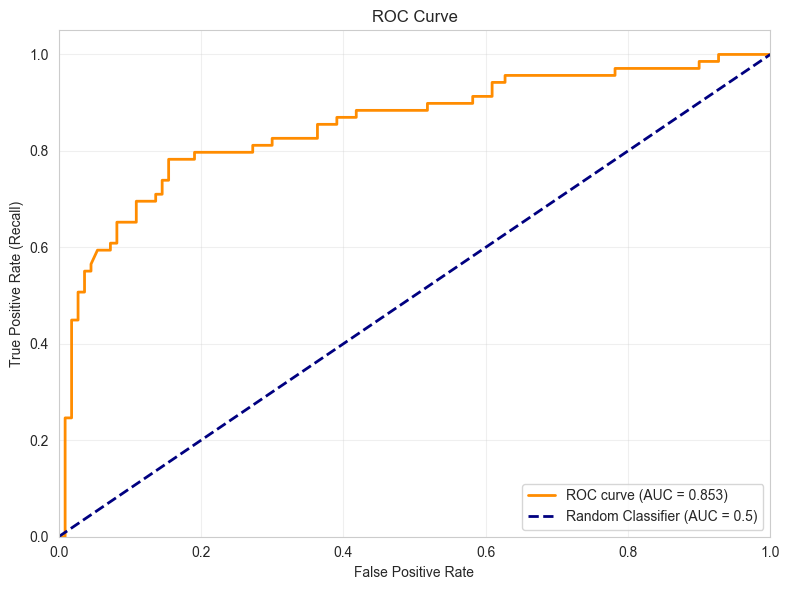

In [27]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, 
         label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, 
         linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 9. Precision-Recall Curve

Precision-Recall curve is especially useful for imbalanced datasets. It shows the trade-off between precision and recall.

**Edge Case**: When classes are highly imbalanced, PR curve is more informative than ROC curve.


In [28]:
# Calculate Precision-Recall curve
precision_vals, recall_vals, thresholds_pr = precision_recall_curve(y_test, y_proba)

# Calculate AUC for PR curve
pr_auc = auc(recall_vals, precision_vals)

print(f"AUC-PR Score: {pr_auc:.4f}")


AUC-PR Score: 0.7862


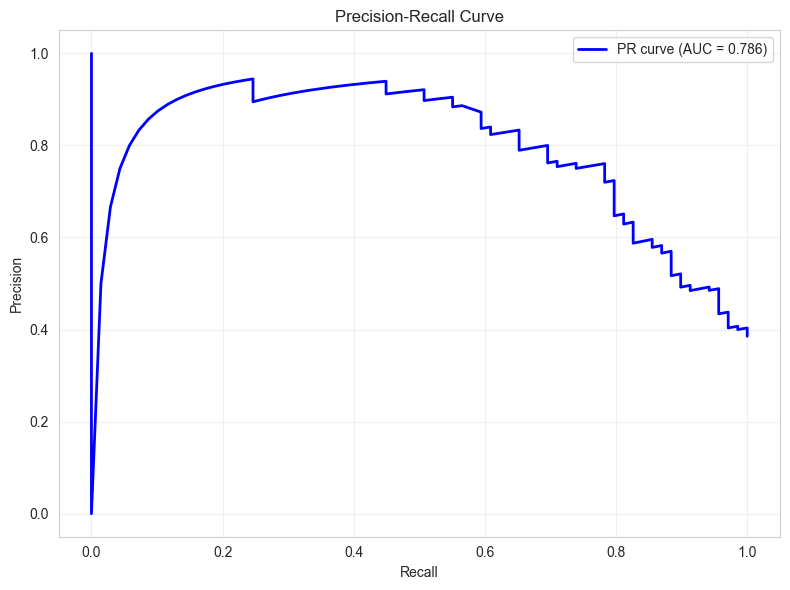

In [29]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='blue', lw=2,
         label=f'PR curve (AUC = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 10. Cost Curves

Cost curves help visualize the cost of misclassification at different thresholds. Useful when false positives and false negatives have different costs.

**Edge Case**: In medical diagnosis, false negatives (missing a disease) may be much costlier than false positives.


In [30]:
# Define cost of false positives and false negatives
# Example: Missing a survivor (FN) costs 2, false alarm (FP) costs 1
cost_fp = 1  # Cost of false positive
cost_fn = 2  # Cost of false negative

# Calculate costs at different thresholds
thresholds_cost = np.arange(0.1, 0.9, 0.01)
total_costs = []

for thresh in thresholds_cost:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    cm_thresh = confusion_matrix(y_test, y_pred_thresh)
    
    # Extract components (assuming binary classification)
    tn, fp, fn, tp = cm_thresh.ravel()
    
    # Calculate total cost
    total_cost = (fp * cost_fp) + (fn * cost_fn)
    total_costs.append(total_cost)


In [31]:
# Find threshold with minimum cost
optimal_cost_idx = np.argmin(total_costs)
optimal_cost_threshold = thresholds_cost[optimal_cost_idx]
min_cost = total_costs[optimal_cost_idx]

print(f"Optimal threshold (min cost): {optimal_cost_threshold:.3f}")
print(f"Minimum total cost: {min_cost}")


Optimal threshold (min cost): 0.420
Minimum total cost: 48


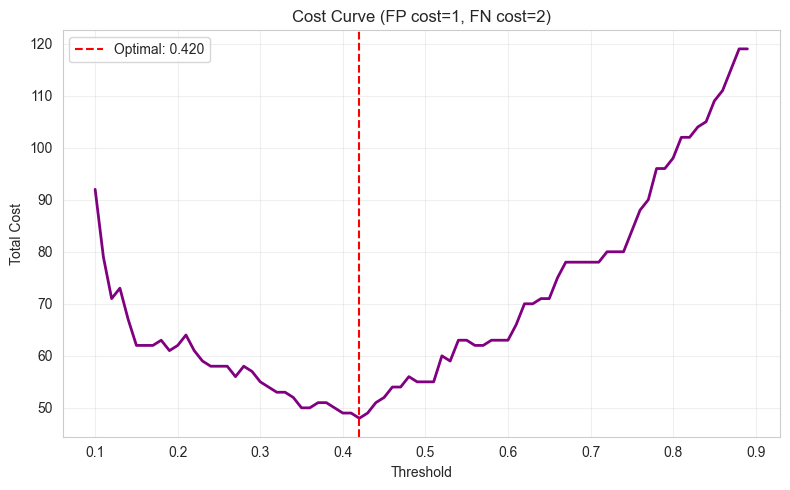

In [32]:
# Plot cost curve
plt.figure(figsize=(8, 5))
plt.plot(thresholds_cost, total_costs, linewidth=2, color='purple')
plt.axvline(optimal_cost_threshold, color='red', linestyle='--',
            label=f'Optimal: {optimal_cost_threshold:.3f}')
plt.xlabel('Threshold')
plt.ylabel('Total Cost')
plt.title(f'Cost Curve (FP cost={cost_fp}, FN cost={cost_fn})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### 10.1 Comparing Different Cost Scenarios

Let's see how different cost ratios affect the optimal threshold.


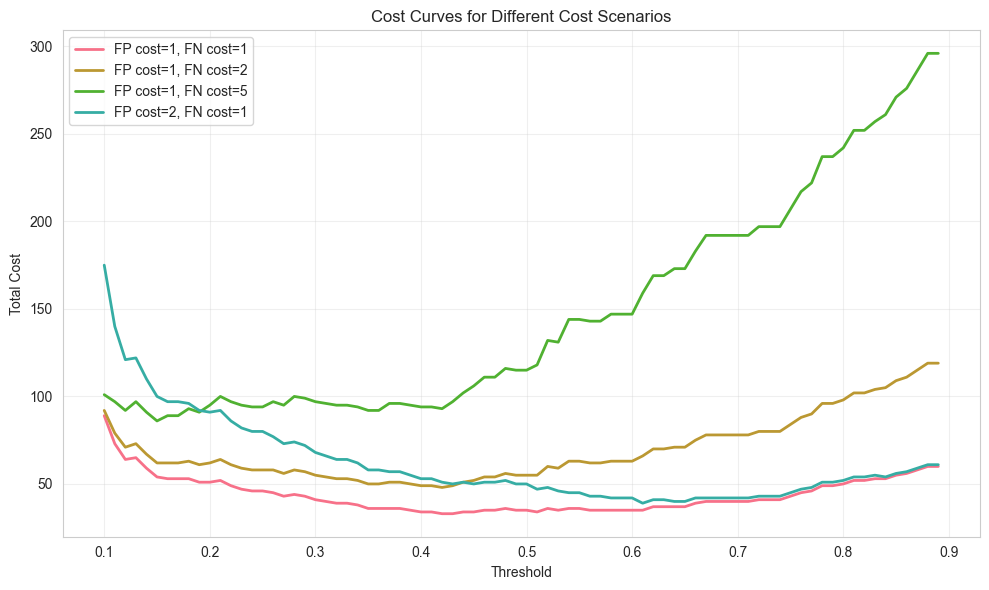

In [33]:
# Test different cost scenarios
cost_scenarios = [
    (1, 1),   # Equal costs
    (1, 2),   # FN costs 2x more
    (1, 5),   # FN costs 5x more
    (2, 1)    # FP costs 2x more
]

fig, ax = plt.subplots(figsize=(10, 6))

for cost_fp, cost_fn in cost_scenarios:
    costs = []
    for thresh in thresholds_cost:
        y_pred_thresh = (y_proba >= thresh).astype(int)
        cm_thresh = confusion_matrix(y_test, y_pred_thresh)
        tn, fp, fn, tp = cm_thresh.ravel()
        costs.append((fp * cost_fp) + (fn * cost_fn))
    
    ax.plot(thresholds_cost, costs, linewidth=2,
            label=f'FP cost={cost_fp}, FN cost={cost_fn}')

ax.set_xlabel('Threshold')
ax.set_ylabel('Total Cost')
ax.set_title('Cost Curves for Different Cost Scenarios')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 11. Handling Imbalanced Data - Fraud Detection Example

In BFSI (Banking, Financial Services, and Insurance), fraud detection is a classic imbalanced problem. Typically, only 1-2% of transactions are fraudulent (90:10 or even 99:1 ratio).

**Critical Edge Case**: With 90% legitimate transactions and 10% fraud, a naive model predicting "always legitimate" gets 90% accuracy but catches ZERO fraud cases - a disaster for banks!

**Business Impact**: Missing fraud (False Negatives) costs millions, while false alarms (False Positives) just annoy customers.


### 11.1 Load Fraud Detection Dataset (Interpretable Features)

We'll use a **Fraud Detection** dataset with **interpretable features** that students can understand:
- `income`: Customer income
- `customer_age`: Customer age
- `credit_risk_score`: Credit risk assessment
- `employment_status`: Employment status (categorical)
- `housing_status`: Housing status (categorical)
- `payment_type`: Payment method (categorical)
- `proposed_credit_limit`: Proposed credit limit
- `prev_address_months_count`: Months at previous address
- `current_address_months_count`: Months at current address
- And many more interpretable features!

**Target**: `fraud_bool` (0=legitimate, 1=fraud)

This is perfect for teaching - all features have clear meanings!


In [34]:
# Load Fraud Detection dataset
df_fraud = pd.read_csv('/Users/varunraste/Downloads/base.csv')

print(f"Dataset loaded! Shape: {df_fraud.shape}")
print(f"\nDataset Info:")
print(df_fraud.info())

# Display interpretable features
interpretable_features = ['income', 'customer_age', 'credit_risk_score', 
                         'employment_status', 'housing_status', 'payment_type',
                         'proposed_credit_limit', 'fraud_bool']
available_features = [f for f in interpretable_features if f in df_fraud.columns]
print(f"\n✓ Found {len(available_features)} interpretable features:")
for feat in available_features:
    print(f"  - {feat}")

print(f"\nTarget: 'fraud_bool' (0=legitimate, 1=fraud)")
df_fraud.head()

Dataset loaded! Shape: (1000000, 32)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null 

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [35]:
# Check for missing values
print("Missing values per column:")
missing = df_fraud.isna().sum()
print(missing[missing > 0] if missing.sum() > 0 else "✓ No missing values!")

# Check original class distribution
target_col = 'fraud_bool'
class_dist_original = df_fraud[target_col].value_counts()
print(f"\nOriginal Dataset - Class Distribution:")
print(class_dist_original)
print(f"\nOriginal Imbalance Ratio: {class_dist_original.iloc[0] / class_dist_original.iloc[1]:.1f}:1")
print(f"Fraud Rate: {class_dist_original.iloc[1] / len(df_fraud):.2%}")

Missing values per column:
✓ No missing values!

Original Dataset - Class Distribution:
fraud_bool
0    988971
1     11029
Name: count, dtype: int64

Original Imbalance Ratio: 89.7:1
Fraud Rate: 1.10%


In [36]:
# Prepare features and target
# Select all features except target
feature_cols = [col for col in df_fraud.columns if col != target_col]
print(f"Selected {len(feature_cols)} features (excluding target)")

# Handle categorical features (encode them)
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_cols = df_fraud[feature_cols].select_dtypes(include=['object']).columns.tolist()
print(f"\nCategorical features to encode: {categorical_cols}")

# Create a copy for processing
df_fraud_processed = df_fraud.copy()




Selected 31 features (excluding target)

Categorical features to encode: ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']


In [37]:
print("Before encoding:")
print(df_fraud_processed[categorical_cols[0]].unique())
# Encode categorical features
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_fraud_processed[col] = le.fit_transform(df_fraud_processed[col].astype(str))
    label_encoders[col] = le
    print(f"  Encoded '{col}': {len(le.classes_)} unique values")
print("After encoding:")
print(df_fraud_processed[categorical_cols[0]].unique())


Before encoding:
['AA' 'AD' 'AB' 'AC' 'AE']
  Encoded 'payment_type': 5 unique values
  Encoded 'employment_status': 7 unique values
  Encoded 'housing_status': 7 unique values
  Encoded 'source': 2 unique values
  Encoded 'device_os': 5 unique values
After encoding:
[0 3 1 2 4]


In [38]:
# Prepare X and y
X_fraud = df_fraud_processed[feature_cols].copy()
y_fraud = df_fraud_processed[target_col].copy()

print(f"\n✓ Data prepared: X shape {X_fraud.shape}, y shape {y_fraud.shape}")


✓ Data prepared: X shape (1000000, 31), y shape (1000000,)


In [39]:
# Sample to create 90:10 ratio for demonstration
np.random.seed(42)

# Get all fraud cases (minority class)
fraud_cases = df_fraud_processed[df_fraud_processed[target_col] == 1]
n_fraud = len(fraud_cases)
print(f"Total fraud cases: {n_fraud:,}")

# Sample legitimate cases to create 90:10 ratio
legitimate_cases = df_fraud_processed[df_fraud_processed[target_col] == 0]
n_legitimate_needed = n_fraud * 9  # 9x more for 90:10 ratio
n_legitimate_available = len(legitimate_cases)

if n_legitimate_needed <= n_legitimate_available:
    legitimate_sample = legitimate_cases.sample(n=n_legitimate_needed, random_state=42)
    print(f"Sampled {n_legitimate_needed:,} legitimate cases (90:10 ratio)")
else:
    # If we don't have enough, use all available
    legitimate_sample = legitimate_cases
    print(f"Using all {n_legitimate_available:,} available legitimate cases")
    print(f"Actual ratio will be: {len(legitimate_sample) / n_fraud:.1f}:1")

# Combine and shuffle
df_fraud_sample = pd.concat([legitimate_sample, fraud_cases]).sample(
    frac=1, random_state=42
).reset_index(drop=True)

# Update X and y with sampled data
X_fraud = df_fraud_sample[feature_cols].copy()
y_fraud = df_fraud_sample[target_col].copy()

# Show new distribution
print("\nSampled Dataset - Class Distribution:")
print(y_fraud.value_counts())
print(f"\nNew Imbalance Ratio: {y_fraud.value_counts()[0] / y_fraud.value_counts()[1]:.1f}:1")
print(f"Fraud Rate: {y_fraud.value_counts()[1] / len(y_fraud):.2%}")
print(f"\n✓ Ready for modeling! Total samples: {len(X_fraud):,}")

Total fraud cases: 11,029
Sampled 99,261 legitimate cases (90:10 ratio)

Sampled Dataset - Class Distribution:
fraud_bool
0    99261
1    11029
Name: count, dtype: int64

New Imbalance Ratio: 9.0:1
Fraud Rate: 10.00%

✓ Ready for modeling! Total samples: 110,290


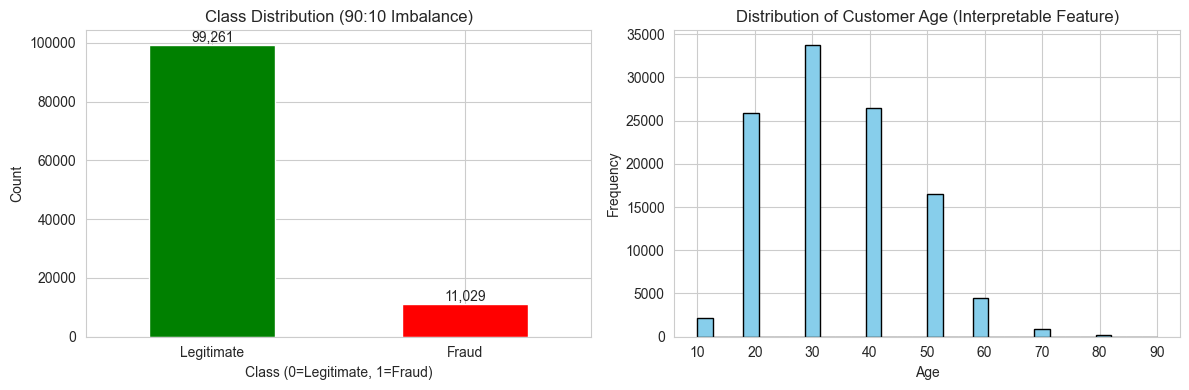


✓ Dataset ready with interpretable features!
   Features like income, customer_age, credit_risk_score are easy to understand!
   Total samples: 110,290
   Total features: 31


In [40]:
# Visualize class distribution and sample interpretable features
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Class distribution
y_fraud.value_counts().plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Class Distribution (90:10 Imbalance)')
axes[0].set_xlabel('Class (0=Legitimate, 1=Fraud)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Legitimate', 'Fraud'], rotation=0)
for i, v in enumerate(y_fraud.value_counts()):
    axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')

# Sample interpretable feature (customer_age or income distribution)
if 'customer_age' in X_fraud.columns:
    X_fraud['customer_age'].hist(bins=30, ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of Customer Age (Interpretable Feature)')
    axes[1].set_xlabel('Age')
    axes[1].set_ylabel('Frequency')
elif 'income' in X_fraud.columns:
    X_fraud['income'].hist(bins=50, ax=axes[1], color='skyblue', edgecolor='black')
    axes[1].set_title('Distribution of Income (Interpretable Feature)')
    axes[1].set_xlabel('Income')
    axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

print("\n✓ Dataset ready with interpretable features!")
print(f"   Features like income, customer_age, credit_risk_score are easy to understand!")
print(f"   Total samples: {len(X_fraud):,}")
print(f"   Total features: {len(X_fraud.columns)}")


### 11.2 Train Model on Imbalanced Data (Baseline)

First, let's see what happens with a standard model on this 90:10 imbalanced data. This demonstrates why handling imbalance is critical!

**What to expect**: The model will likely favor the majority class (legitimate transactions) and miss most fraud cases.


In [41]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split with stratification to maintain class distribution
X_fraud_train, X_fraud_test, y_fraud_train, y_fraud_test = train_test_split(
    X_fraud, y_fraud, test_size=0.2, random_state=42, stratify=y_fraud
)

print(f"Training set: {X_fraud_train.shape[0]:,} samples")
print(f"Test set: {X_fraud_test.shape[0]:,} samples")
print(f"\nTraining class distribution:")
print(y_fraud_train.value_counts())
print(f"\nTest class distribution:")
print(y_fraud_test.value_counts())

# Scale features (important for logistic regression)
scaler = StandardScaler()
X_fraud_train_scaled = scaler.fit_transform(X_fraud_train)
X_fraud_test_scaled = scaler.transform(X_fraud_test)

print(f"\n✓ Data split and scaled! Features: {X_fraud_train.shape[1]}")


Training set: 88,232 samples
Test set: 22,058 samples

Training class distribution:
fraud_bool
0    79409
1     8823
Name: count, dtype: int64

Test class distribution:
fraud_bool
0    19852
1     2206
Name: count, dtype: int64

✓ Data split and scaled! Features: 31


In [42]:
# Train standard model WITHOUT class weights (baseline)
model_fraud_standard = LogisticRegression(random_state=42, max_iter=1000)
model_fraud_standard.fit(X_fraud_train_scaled, y_fraud_train)

# Get predictions
y_fraud_proba = model_fraud_standard.predict_proba(X_fraud_test_scaled)[:, 1]
y_fraud_pred = model_fraud_standard.predict(X_fraud_test_scaled)

print("Standard Model (No Class Weights) - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred):.4f}  ⚠️  This will be VERY LOW!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred):.4f}")

# Show confusion matrix
cm_standard = confusion_matrix(y_fraud_test, y_fraud_pred)
print(f"\nConfusion Matrix:")
print(f"  Legitimate correctly identified (TN): {cm_standard[0,0]:,}")
print(f"  False Alarms (FP): {cm_standard[0,1]:,}")
print(f"  MISSED FRAUD (FN): {cm_standard[1,0]:,}  <-- CRITICAL!")
print(f"  Fraud caught (TP): {cm_standard[1,1]:,}")


Standard Model (No Class Weights) - Results:
  Accuracy:  0.9118
  Precision: 0.6529
  Recall:    0.2516  ⚠️  This will be VERY LOW!
  F1-Score:  0.3632

Confusion Matrix:
  Legitimate correctly identified (TN): 19,557
  False Alarms (FP): 295
  MISSED FRAUD (FN): 1,651  <-- CRITICAL!
  Fraud caught (TP): 555


### 11.3 Method 1: Use Class Weights

Class weights automatically adjust the model to penalize misclassifying fraud (minority class) more heavily. 

**How it works**: With 90:10 imbalance, fraud class gets 9x more weight, making the model pay more attention to catching fraud cases.

**Advantage**: No need to modify the dataset, just change model parameters.


In [43]:
# Train model WITH balanced class weights
model_fraud_balanced = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    class_weight='balanced'  # Automatically balances class weights
)
model_fraud_balanced.fit(X_fraud_train_scaled, y_fraud_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [44]:
# Get predictions
y_fraud_proba_balanced = model_fraud_balanced.predict_proba(X_fraud_test_scaled)[:, 1]
y_fraud_pred_balanced = model_fraud_balanced.predict(X_fraud_test_scaled)

print("Balanced Class Weights Model - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}  ✅ Much Better!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}")



Balanced Class Weights Model - Results:
  Accuracy:  0.7902
  Precision: 0.2947
  Recall:    0.7879  ✅ Much Better!
  F1-Score:  0.4289


In [45]:
# Compare with standard model
print(f"\n📊 Comparison:")
print(f"  Recall improved: {recall_score(y_fraud_test, y_fraud_pred_balanced) - recall_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"  💡 Key Insight: Recall (catching fraud) improved significantly!")
print(f"     In fraud detection, high recall is critical - we can't miss fraud!")



📊 Comparison:
  Recall improved: 0.5363
  💡 Key Insight: Recall (catching fraud) improved significantly!
     In fraud detection, high recall is critical - we can't miss fraud!


### 11.4 Method 2: Oversampling (Resampling)

We can oversample fraud cases to balance the dataset from 90:10 to 50:50. This creates more fraud examples for the model to learn from.

**How it works**: Duplicate fraud cases until we have equal numbers of legitimate and fraud transactions.

**Note**: This increases training data size, which may slow down training slightly.


In [46]:
# Oversample fraud cases to balance the dataset
from sklearn.utils import resample

# Combine X and y for resampling
df_fraud_train = pd.DataFrame(X_fraud_train_scaled, columns=X_fraud.columns)
df_fraud_train['target'] = y_fraud_train.values

# Separate classes
legitimate = df_fraud_train[df_fraud_train['target'] == 0]
fraud = df_fraud_train[df_fraud_train['target'] == 1]

print(f"Before oversampling:")
print(f"  Legitimate: {len(legitimate):,}")
print(f"  Fraud: {len(fraud):,}")



Before oversampling:
  Legitimate: 79,409
  Fraud: 8,823


In [47]:
# Upsample fraud to match legitimate
fraud_upsampled = resample(fraud, 
                           replace=True,  # Sample with replacement
                           n_samples=len(legitimate),  # Match legitimate count
                           random_state=42)

# Combine
df_fraud_upsampled = pd.concat([legitimate, fraud_upsampled]).sample(
    frac=1, random_state=42
).reset_index(drop=True)

df_fraud_upsampled .head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,...,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,target
0,0.439436,-0.408081,0.605017,-0.927923,-1.165366,2.820780,-0.454014,0.771234,0.358265,0.629933,...,-0.670321,-0.167539,-0.087999,-0.643785,1.130624,-1.116501,-0.121734,0.0,-1.490648,0
1,-0.937044,0.282723,-0.388566,0.011257,-0.350930,-0.190205,-0.467117,-0.271288,0.294530,-0.439913,...,-0.670321,-0.167539,-0.087999,-0.307559,1.130624,-1.116501,-0.121734,0.0,0.312109,0
2,0.439436,1.199833,-0.388566,-0.181105,0.463506,-0.189411,-0.447455,-0.271288,-0.765062,-1.388826,...,-0.670321,-0.167539,-0.087999,-0.129211,0.312573,0.895655,-0.121734,0.0,1.213488,0
3,0.095316,-1.104681,-0.388566,-0.611091,0.463506,-0.188210,-0.465072,0.771234,0.615196,-0.368426,...,-0.082878,-0.167539,11.363789,3.569849,0.312573,-1.116501,-0.121734,0.0,0.312109,1
4,-1.281164,-1.180151,-0.388566,2.353548,2.092378,-0.182887,-0.494709,-0.271288,1.265491,0.936650,...,-0.670321,-0.167539,-0.087999,-0.729128,1.130624,-1.116501,-0.121734,0.0,-1.039959,0


In [48]:
# Split back to X and y
X_fraud_upsampled = df_fraud_upsampled.drop('target', axis=1).values
y_fraud_upsampled = df_fraud_upsampled['target'].values

print(f"\nAfter oversampling:")
print(f"  Legitimate: {(y_fraud_upsampled == 0).sum():,}")
print(f"  Fraud: {(y_fraud_upsampled == 1).sum():,}")
print(f"  Ratio: 50:50 ✓")



After oversampling:
  Legitimate: 79,409
  Fraud: 79,409
  Ratio: 50:50 ✓


In [49]:
# Train model on upsampled data
model_fraud_upsampled = LogisticRegression(random_state=42, max_iter=1000)
model_fraud_upsampled.fit(X_fraud_upsampled, y_fraud_upsampled)




,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [50]:
# Get predictions on test set
y_fraud_pred_upsampled = model_fraud_upsampled.predict(X_fraud_test_scaled)

print("Upsampled Data Model - Results:")
print(f"  Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"  Precision: {precision_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"  Recall:    {recall_score(y_fraud_test, y_fraud_pred_upsampled):.4f}  ✅ Good!")
print(f"  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")

Upsampled Data Model - Results:
  Accuracy:  0.7899
  Precision: 0.2944
  Recall:    0.7883  ✅ Good!
  F1-Score:  0.4287


In [51]:
# Compare all three approaches
print("=" * 70)
print("FRAUD DETECTION MODEL COMPARISON (90:10 Imbalanced Data)")
print("=" * 70)

print("\n1. Standard Model (No Handling):")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred):.4f}  ⚠️  Very Low!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred):.4f}")

print("\n2. Balanced Class Weights:")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}  ✅ Much Better!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}")

print("\n3. Upsampled Data:")
print(f"   Precision: {precision_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")
print(f"   Recall:    {recall_score(y_fraud_test, y_fraud_pred_upsampled):.4f}  ✅ Good!")
print(f"   F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_upsampled):.4f}")

print("\n💡 Business Impact:")
print("   - High Recall = Catch more fraud (save money)")
print("   - Lower Precision = More false alarms (customer annoyance)")
print("   - In fraud detection, RECALL is often more important than precision!")


FRAUD DETECTION MODEL COMPARISON (90:10 Imbalanced Data)

1. Standard Model (No Handling):
   Precision: 0.6529
   Recall:    0.2516  ⚠️  Very Low!
   F1-Score:  0.3632

2. Balanced Class Weights:
   Precision: 0.2947
   Recall:    0.7879  ✅ Much Better!
   F1-Score:  0.4289

3. Upsampled Data:
   Precision: 0.2944
   Recall:    0.7883  ✅ Good!
   F1-Score:  0.4287

💡 Business Impact:
   - High Recall = Catch more fraud (save money)
   - Lower Precision = More false alarms (customer annoyance)
   - In fraud detection, RECALL is often more important than precision!


### 11.5 Visual Comparison: Why 90:10 Imbalance is Dangerous

Let's visualize how the standard model fails on imbalanced data and how our solutions improve fraud detection.

**Key Insight**: Notice how the standard model has very low True Positives (fraud caught) in the confusion matrix!


In [52]:
# Calculate ROC curves for all models
y_fraud_proba_upsampled = model_fraud_upsampled.predict_proba(X_fraud_test_scaled)[:, 1]

fpr_std, tpr_std, _ = roc_curve(y_fraud_test, y_fraud_proba)
fpr_bal, tpr_bal, _ = roc_curve(y_fraud_test, y_fraud_proba_balanced)
fpr_up, tpr_up, _ = roc_curve(y_fraud_test, y_fraud_proba_upsampled)

# Calculate AUCs
auc_std = roc_auc_score(y_fraud_test, y_fraud_proba)
auc_bal = roc_auc_score(y_fraud_test, y_fraud_proba_balanced)
auc_up = roc_auc_score(y_fraud_test, y_fraud_proba_upsampled)

print("AUC-ROC Scores:")
print(f"  Standard: {auc_std:.4f}")
print(f"  Balanced Weights: {auc_bal:.4f}")
print(f"  Upsampled: {auc_up:.4f}")


AUC-ROC Scores:
  Standard: 0.8657
  Balanced Weights: 0.8664
  Upsampled: 0.8664


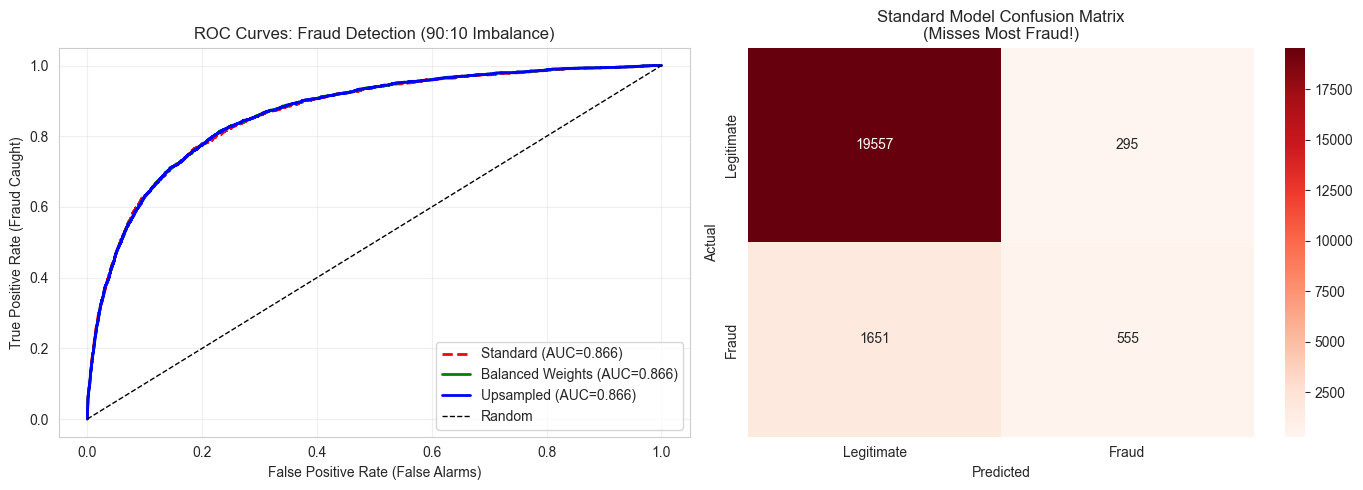


⚠️  Notice: Standard model has very low True Positives (fraud caught)
   This is why handling imbalanced data is CRITICAL in fraud detection!


In [53]:
# Visualize ROC curves and confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROC Curves
axes[0].plot(fpr_std, tpr_std, label=f'Standard (AUC={auc_std:.3f})', 
             linewidth=2, color='red', linestyle='--')
axes[0].plot(fpr_bal, tpr_bal, label=f'Balanced Weights (AUC={auc_bal:.3f})', 
             linewidth=2, color='green')
axes[0].plot(fpr_up, tpr_up, label=f'Upsampled (AUC={auc_up:.3f})', 
             linewidth=2, color='blue')
axes[0].plot([0, 1], [0, 1], 'k--', label='Random', linewidth=1)
axes[0].set_xlabel('False Positive Rate (False Alarms)')
axes[0].set_ylabel('True Positive Rate (Fraud Caught)')
axes[0].set_title('ROC Curves: Fraud Detection (90:10 Imbalance)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Confusion Matrix for Standard Model
cm_std = confusion_matrix(y_fraud_test, y_fraud_pred)
sns.heatmap(cm_std, annot=True, fmt='d', cmap='Reds', ax=axes[1], 
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
axes[1].set_title('Standard Model Confusion Matrix\n(Misses Most Fraud!)')
axes[1].set_ylabel('Actual')
axes[1].set_xlabel('Predicted')

plt.tight_layout()
plt.show()

print("\n⚠️  Notice: Standard model has very low True Positives (fraud caught)")
print("   This is why handling imbalanced data is CRITICAL in fraud detection!")


## 12. Advanced Model Evaluation: Lift Charts, Gain Charts, and KS Statistics

In fraud detection and marketing analytics, we need to understand **model performance at different deciles** of the population. These metrics help answer critical business questions:

- **Lift Chart**: "How much better is our model compared to random selection?"
- **Gain Chart**: "What percentage of fraud cases can we catch by targeting the top X% of high-risk customers?"
- **KS Statistic**: "What's the maximum separation between fraud and legitimate cases?"

**Business Context**: In fraud detection, we can't investigate all transactions. We need to prioritize the riskiest ones. These charts show us exactly how to do that!


### 12.1 Understanding Decile Analysis

We'll divide our test set into 10 equal groups (deciles) based on predicted fraud probability, from highest risk (Decile 1) to lowest risk (Decile 10).

**Key Insight**: If our model is good, most fraud cases should be in the top deciles (high predicted probability).


In [54]:
# Use the balanced class weights model for decile analysis
# This model showed better recall (catches more fraud)
y_proba_fraud = y_fraud_proba_balanced.copy()
y_actual_fraud = y_fraud_test.copy()

# Create DataFrame with predictions and actuals
df_decile = pd.DataFrame({
    'actual': y_actual_fraud.values,
    'predicted_prob': y_proba_fraud
})

# Sort by predicted probability (descending - highest risk first)
df_decile = df_decile.sort_values('predicted_prob', ascending=False).reset_index(drop=True)

# Assign decile ranks (1 = highest risk, 10 = lowest risk)
n_samples = len(df_decile)
decile_size = n_samples // 10
df_decile['decile'] = (df_decile.index // decile_size) + 1
df_decile['decile'] = df_decile['decile'].clip(upper=10)  # Ensure last decile is 10

print(f"Total samples: {n_samples:,}")
print(f"Decile size: {decile_size:,} samples per decile")
print(f"\nFirst few rows (highest risk):")


df_decile.head(10)


Total samples: 22,058
Decile size: 2,205 samples per decile

First few rows (highest risk):


,actual,predicted_prob,decile
0,1,0.996252,1
1,1,0.993966,1
2,1,0.993354,1
3,0,0.993091,1
4,1,0.992866,1
5,1,0.992627,1
6,1,0.992447,1
7,1,0.992053,1
8,1,0.991745,1
9,1,0.990720,1


In [55]:
# Calculate metrics for each decile
decile_stats = []

for decile in range(1, 11):
    decile_data = df_decile[df_decile['decile'] == decile]
    
    n_total = len(decile_data)
    n_fraud = decile_data['actual'].sum()
    fraud_rate = n_fraud / n_total if n_total > 0 else 0
    avg_prob = decile_data['predicted_prob'].mean()
    
    decile_stats.append({
        'decile': decile,
        'n_total': n_total,
        'n_fraud': n_fraud,
        'fraud_rate': fraud_rate,
        'avg_predicted_prob': avg_prob,
        'cumulative_fraud': df_decile[df_decile['decile'] <= decile]['actual'].sum(),
        'cumulative_pct': (df_decile[df_decile['decile'] <= decile]['actual'].sum() / 
                          df_decile['actual'].sum()) * 100 if df_decile['actual'].sum() > 0 else 0
    })

df_decile_stats = pd.DataFrame(decile_stats)

# Calculate overall fraud rate (baseline)
overall_fraud_rate = df_decile['actual'].mean()

# Calculate lift (how many times better than random)
df_decile_stats['lift'] = df_decile_stats['fraud_rate'] / overall_fraud_rate

print("Decile Analysis Summary:")
print("=" * 80)

print(f"\nOverall fraud rate (baseline): {overall_fraud_rate:.4f} ({overall_fraud_rate*100:.2f}%)")
df_decile_stats.round(4)



Decile Analysis Summary:

Overall fraud rate (baseline): 0.1000 (10.00%)


,decile,n_total,n_fraud,fraud_rate,avg_predicted_prob,cumulative_fraud,cumulative_pct,lift
0,1,2205,1090,0.4943,0.8763,1090,49.4107,4.9429
1,2,2205,467,0.2118,0.6886,1557,70.5802,2.1177
2,3,2205,255,0.1156,0.5253,1812,82.1396,1.1564
3,4,2205,143,0.0649,0.3995,1955,88.6219,0.6485
4,5,2205,81,0.0367,0.2991,2036,92.2937,0.3673
5,6,2205,68,0.0308,0.2214,2104,95.3762,0.3084
6,7,2205,39,0.0177,0.1575,2143,97.1442,0.1769
7,8,2205,28,0.0127,0.1081,2171,98.4134,0.1270
8,9,2205,21,0.0095,0.0671,2192,99.3654,0.0952
9,10,2213,14,0.0063,0.0278,2206,100.0000,0.0633


### 12.2 Lift Chart

**Lift** measures how much better our model performs compared to random selection.

- **Lift = 1.0**: Model performs same as random (no improvement)
- **Lift > 1.0**: Model is better than random (higher is better)
- **Lift < 1.0**: Model is worse than random

**Business Interpretation**: A lift of 3.0 in Decile 1 means fraud rate is 3x higher in the top 10% of high-risk transactions compared to the overall fraud rate.


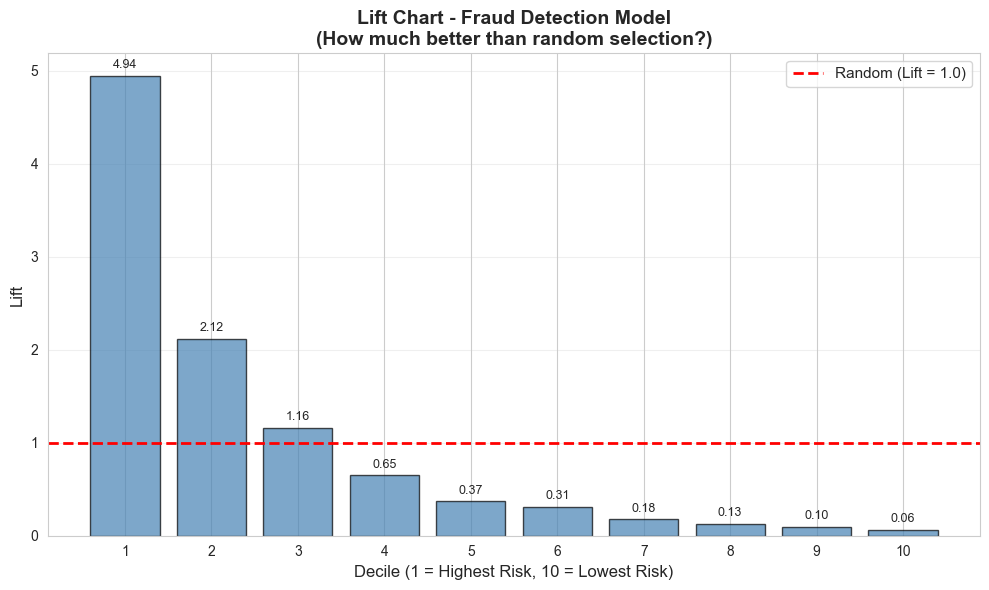

💡 Key Insights from Lift Chart:
   - Top Decile (Decile 1) has lift of 4.94x
     This means fraud rate is 4.9x higher than average!
   - Bottom Decile (Decile 10) has lift of 0.06x
   - Good models show high lift in top deciles and low lift in bottom deciles


In [56]:
# Create Lift Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lift for each decile
ax.bar(df_decile_stats['decile'], df_decile_stats['lift'], 
       color='steelblue', edgecolor='black', alpha=0.7)

# Add reference line at lift = 1.0 (random performance)
ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2, 
           label='Random (Lift = 1.0)')

# Customize plot
ax.set_xlabel('Decile (1 = Highest Risk, 10 = Lowest Risk)', fontsize=12)
ax.set_ylabel('Lift', fontsize=12)
ax.set_title('Lift Chart - Fraud Detection Model\n(How much better than random selection?)', 
             fontsize=14, fontweight='bold')
ax.set_xticks(range(1, 11))
ax.grid(True, alpha=0.3, axis='y')
ax.legend(fontsize=11)

# Add value labels on bars
for idx, row in df_decile_stats.iterrows():
    ax.text(row['decile'], row['lift'] + 0.05, f"{row['lift']:.2f}", 
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Print key insights
print("💡 Key Insights from Lift Chart:")
print(f"   - Top Decile (Decile 1) has lift of {df_decile_stats.iloc[0]['lift']:.2f}x")
print(f"     This means fraud rate is {df_decile_stats.iloc[0]['lift']:.1f}x higher than average!")
print(f"   - Bottom Decile (Decile 10) has lift of {df_decile_stats.iloc[9]['lift']:.2f}x")
print(f"   - Good models show high lift in top deciles and low lift in bottom deciles")


### 12.4 Kolmogorov-Smirnov (KS) Statistic

**KS Statistic** measures the maximum separation between the cumulative distribution of fraud cases and legitimate cases across all deciles.

- **KS = 0**: No separation (model is useless)
- **KS = 1**: Perfect separation (model is perfect)
- **KS > 0.4**: Good model (commonly used threshold in industry)
- **KS > 0.5**: Excellent model

**Business Interpretation**: Higher KS means the model better distinguishes between fraud and legitimate transactions.


In [57]:
def ensure_variable(name, default_func=None, error_msg=None):
    """Check if a variable exists in the globals; if not, assign using default_func or raise NameError."""
    global_vars = globals()
    if name not in global_vars:
        if default_func is not None:
            global_vars[name] = default_func()
            print(f"✓ Calculated {name}: {global_vars[name]:,}" if isinstance(global_vars[name], int) else f"✓ Calculated {name}")
        else:
            print(error_msg or f"⚠️ Warning: {name} not found.")
            raise NameError(error_msg or f"{name} not found.")
    return global_vars[name]

# Ensure required variables
df_decile = ensure_variable(
    "df_decile",
    default_func=None,
    error_msg="df_decile not found. Please run the decile analysis cell first."
)
df_decile_stats = ensure_variable(
    "df_decile_stats",
    default_func=None,
    error_msg="df_decile_stats not found. Please run the decile statistics cell first."
)
n_samples = ensure_variable(
    "n_samples",
    default_func=lambda: len(df_decile)
)
total_fraud = ensure_variable(
    "total_fraud",
    default_func=lambda: df_decile['actual'].sum()
)

✓ Calculated total_fraud


In [58]:
# Calculate additional stats columns if needed
if 'cumulative_pct_population' not in df_decile_stats.columns:
    df_decile_stats['cumulative_pct_population'] = df_decile_stats['decile'] * 10
    print("✓ Calculated cumulative_pct_population")

if 'cumulative_pct_fraud' not in df_decile_stats.columns:
    df_decile_stats['cumulative_pct_fraud'] = (
        df_decile_stats['cumulative_fraud'] / total_fraud * 100
    )
    print("✓ Calculated cumulative_pct_fraud")

if 'cumulative_pct_legitimate' not in df_decile_stats.columns:
    # Cumulative legitimate = (cumulative population - cumulative fraud) / total legitimate * 100
    df_decile_stats['cumulative_pct_legitimate'] = (
        (df_decile_stats['cumulative_pct_population']/100 * n_samples - df_decile_stats['cumulative_fraud'])
        / (n_samples - total_fraud) * 100
    )
    print("✓ Calculated cumulative_pct_legitimate")

# Compute KS
df_decile_stats['ks'] = (
    df_decile_stats['cumulative_pct_fraud'] - df_decile_stats['cumulative_pct_legitimate']
)

# Output
print("\n" + "=" * 80)
print("DECILE STATISTICS WITH KS CALCULATION")
print("=" * 80)
print("\nDataFrame showing all decile metrics:")

# Build list of existing columns for display (dynamic)
potential_cols = [
    'decile', 'n_total', 'n_fraud', 'fraud_rate', 'lift',
    'cumulative_pct_population', 'cumulative_pct_fraud',
    'cumulative_pct_legitimate', 'ks'
]
display_cols = [col for col in potential_cols if col in df_decile_stats.columns]
df_decile_stats[display_cols].round(4)

✓ Calculated cumulative_pct_population
✓ Calculated cumulative_pct_fraud
✓ Calculated cumulative_pct_legitimate

DECILE STATISTICS WITH KS CALCULATION

DataFrame showing all decile metrics:


,decile,n_total,n_fraud,fraud_rate,lift,cumulative_pct_population,cumulative_pct_fraud,cumulative_pct_legitimate,ks
0,1,2205,1090,0.4943,4.9429,10,49.4107,5.6206,43.7901
1,2,2205,467,0.2118,2.1177,20,70.5802,14.3794,56.2008
2,3,2205,255,0.1156,1.1564,30,82.1396,24.2061,57.9335
3,4,2205,143,0.0649,0.6485,40,88.6219,34.5970,54.0249
4,5,2205,81,0.0367,0.3673,50,92.2937,45.3002,46.9935
5,6,2205,68,0.0308,0.3084,60,95.3762,56.0689,39.3073
6,7,2205,39,0.0177,0.1769,70,97.1442,66.9837,30.1605
7,8,2205,28,0.0127,0.1270,80,98.4134,77.9539,20.4596
8,9,2205,21,0.0095,0.0952,90,99.3654,88.9593,10.4061
9,10,2213,14,0.0063,0.0633,100,100.0000,100.0000,0.0000


In [59]:
# Find maximum KS (KS statistic)
ks_statistic = df_decile_stats['ks'].max()
ks_decile = df_decile_stats.loc[df_decile_stats['ks'].idxmax(), 'decile']

print("\n" + "=" * 80)
print("KS STATISTIC RESULTS")
print("=" * 80)
print(f"KS Statistic: {ks_statistic:.4f} ({ks_statistic*100:.2f}%)")
print(f"Maximum separation occurs at Decile {int(ks_decile)}")
print(f"\nModel Quality: ", end="")



KS STATISTIC RESULTS
KS Statistic: 57.9335 (5793.35%)
Maximum separation occurs at Decile 3

Model Quality: 

In [60]:
if ks_statistic >= 0.5:
    print("Excellent (KS >= 0.5) ✅")
elif ks_statistic >= 0.4:
    print("Good (KS >= 0.4) ✅")
elif ks_statistic >= 0.3:
    print("Fair (KS >= 0.3) ⚠️")
else:
    print("Poor (KS < 0.3) ❌")

# Show the row with maximum KS for better understanding
print(f"\n📊 Decile with Maximum KS (Decile {int(ks_decile)}):")
max_ks_row = df_decile_stats.loc[df_decile_stats['ks'].idxmax()]
print(f"   Cumulative % Fraud:      {max_ks_row['cumulative_pct_fraud']:.2f}%")
print(f"   Cumulative % Legitimate:  {max_ks_row['cumulative_pct_legitimate']:.2f}%")
print(f"   KS (Difference):          {max_ks_row['ks']:.4f}")
print(f"   This is where the model best separates fraud from legitimate cases!")


Excellent (KS >= 0.5) ✅

📊 Decile with Maximum KS (Decile 3):
   Cumulative % Fraud:      82.14%
   Cumulative % Legitimate:  24.21%
   KS (Difference):          57.9335
   This is where the model best separates fraud from legitimate cases!


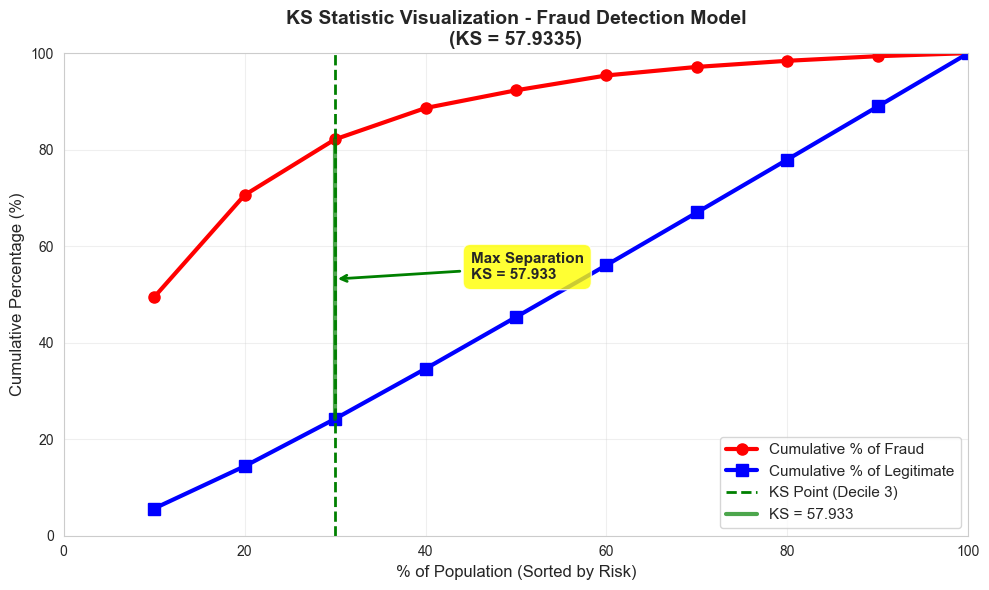


💡 Interpretation:
   - At Decile 3, there's maximum separation between fraud and legitimate
   - KS = 57.933 means the model can distinguish fraud from legitimate cases well
   - This is a key metric used in banking and fraud detection systems!


In [61]:
# Visualize KS Statistic
fig, ax = plt.subplots(figsize=(10, 6))

# Plot cumulative % of fraud
ax.plot(df_decile_stats['cumulative_pct_population'], 
        df_decile_stats['cumulative_pct_fraud'],
        marker='o', linewidth=3, markersize=8, label='Cumulative % of Fraud', color='red')

# Plot cumulative % of legitimate
ax.plot(df_decile_stats['cumulative_pct_population'], 
        df_decile_stats['cumulative_pct_legitimate'],
        marker='s', linewidth=3, markersize=8, label='Cumulative % of Legitimate', color='blue')

# Highlight maximum separation (KS point)
ks_idx = df_decile_stats['ks'].idxmax()
ks_x = df_decile_stats.loc[ks_idx, 'cumulative_pct_population']
ks_y_fraud = df_decile_stats.loc[ks_idx, 'cumulative_pct_fraud']
ks_y_legit = df_decile_stats.loc[ks_idx, 'cumulative_pct_legitimate']

# Draw vertical line at KS point
ax.axvline(x=ks_x, color='green', linestyle='--', linewidth=2, 
           label=f'KS Point (Decile {int(df_decile_stats.loc[ks_idx, "decile"])})')

# Draw horizontal line showing KS distance
ax.plot([ks_x, ks_x], [ks_y_legit, ks_y_fraud], 
        'g-', linewidth=3, alpha=0.7, label=f'KS = {ks_statistic:.3f}')

# Customize plot
ax.set_xlabel('% of Population (Sorted by Risk)', fontsize=12)
ax.set_ylabel('Cumulative Percentage (%)', fontsize=12)
ax.set_title(f'KS Statistic Visualization - Fraud Detection Model\n(KS = {ks_statistic:.4f})', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

# Add annotation for KS point
ax.annotate(f'Max Separation\nKS = {ks_statistic:.3f}',
            xy=(ks_x, (ks_y_fraud + ks_y_legit) / 2),
            xytext=(ks_x + 15, (ks_y_fraud + ks_y_legit) / 2),
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.8),
            fontsize=11, fontweight='bold', ha='left')

plt.tight_layout()
plt.show()

print(f"\n💡 Interpretation:")
print(f"   - At Decile {int(ks_decile)}, there's maximum separation between fraud and legitimate")
print(f"   - KS = {ks_statistic:.3f} means the model can distinguish fraud from legitimate cases well")
print(f"   - This is a key metric used in banking and fraud detection systems!")


### 12.3 Gain Chart (Cumulative Gains)

**Gain Chart** shows the cumulative percentage of fraud cases captured by targeting the top X% of high-risk transactions.

**Business Question**: "If we investigate only the top 20% of high-risk transactions, what percentage of all fraud cases will we catch?"

**Perfect Model**: Would catch 100% of fraud in the top 10% (if fraud rate is 10%)
**Random Model**: Would catch 20% of fraud when targeting top 20% (linear line)

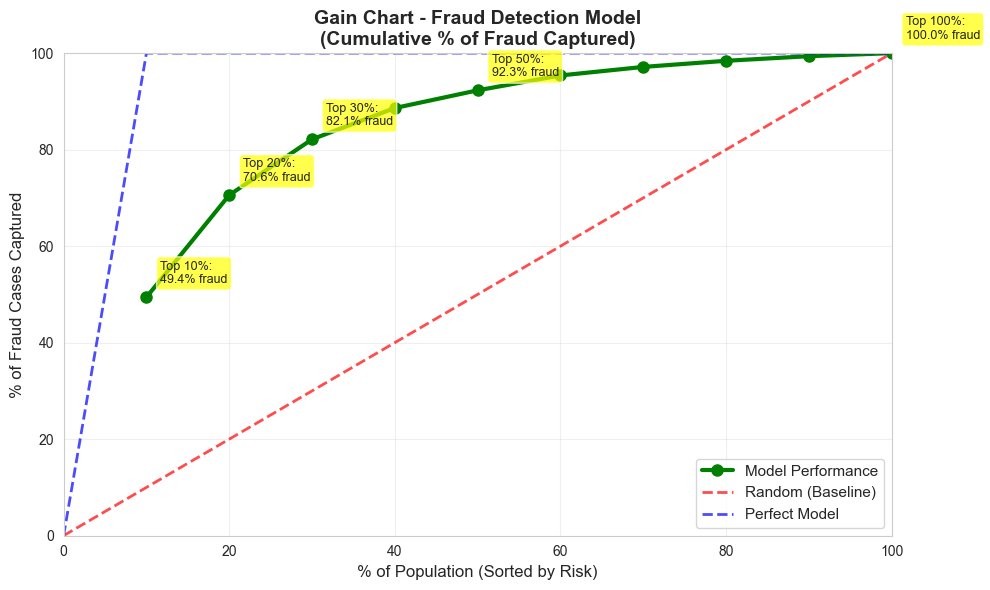

💡 Key Insights from Gain Chart:
   - By targeting top 20% of high-risk transactions, we catch 70.6% of all fraud
   - By targeting top 30% of high-risk transactions, we catch 82.1% of all fraud
   - This helps prioritize investigation resources efficiently!


In [62]:
# Prepare data for Gain Chart
# Calculate cumulative percentage of population and cumulative percentage of fraud
df_decile_stats['cumulative_pct_population'] = df_decile_stats['decile'] * 10  # Each decile is 10% of population
total_fraud = df_decile['actual'].sum()

# Calculate cumulative fraud percentage
df_decile_stats['cumulative_pct_fraud'] = (
    df_decile_stats['cumulative_fraud'] / total_fraud * 100
)

# Create Gain Chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot model performance (cumulative gain)
ax.plot(df_decile_stats['cumulative_pct_population'], 
        df_decile_stats['cumulative_pct_fraud'],
        marker='o', linewidth=3, markersize=8, label='Model Performance', color='green')

# Plot random/baseline (diagonal line - 20% population = 20% fraud)
ax.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Random (Baseline)', alpha=0.7)

# Plot perfect model (if we could catch all fraud in top 10%)
# For 10% fraud rate, perfect model would catch 100% fraud in top 10% of population
fraud_rate_pct = overall_fraud_rate * 100
perfect_x = [0, fraud_rate_pct, 100]
perfect_y = [0, 100, 100]
ax.plot(perfect_x, perfect_y, 'b--', linewidth=2, label='Perfect Model', alpha=0.7)

# Customize plot
ax.set_xlabel('% of Population (Sorted by Risk)', fontsize=12)
ax.set_ylabel('% of Fraud Cases Captured', fontsize=12)
ax.set_title('Gain Chart - Fraud Detection Model\n(Cumulative % of Fraud Captured)', 
             fontsize=14, fontweight='bold')
ax.set_xlim(0, 100)
ax.set_ylim(0, 100)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=11, loc='lower right')

# Add annotations for key points
for idx in [0, 1, 2, 4, 9]:  # Deciles 1, 2, 3, 5, 10
    row = df_decile_stats.iloc[idx]
    ax.annotate(f"Top {row['cumulative_pct_population']:.0f}%:\n{row['cumulative_pct_fraud']:.1f}% fraud",
                xy=(row['cumulative_pct_population'], row['cumulative_pct_fraud']),
                xytext=(10, 10), textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7),
                fontsize=9, ha='left')

plt.tight_layout()
plt.show()

# Print key insights
print("💡 Key Insights from Gain Chart:")
top_20_pct_fraud = df_decile_stats[df_decile_stats['cumulative_pct_population'] == 20]['cumulative_pct_fraud'].values[0]
top_30_pct_fraud = df_decile_stats[df_decile_stats['cumulative_pct_population'] == 30]['cumulative_pct_fraud'].values[0]
print(f"   - By targeting top 20% of high-risk transactions, we catch {top_20_pct_fraud:.1f}% of all fraud")
print(f"   - By targeting top 30% of high-risk transactions, we catch {top_30_pct_fraud:.1f}% of all fraud")
print(f"   - This helps prioritize investigation resources efficiently!")


### 12.5 Combined Visualization: Lift, Gain, and KS

Let's create a comprehensive visualization showing all three metrics together for easy comparison.


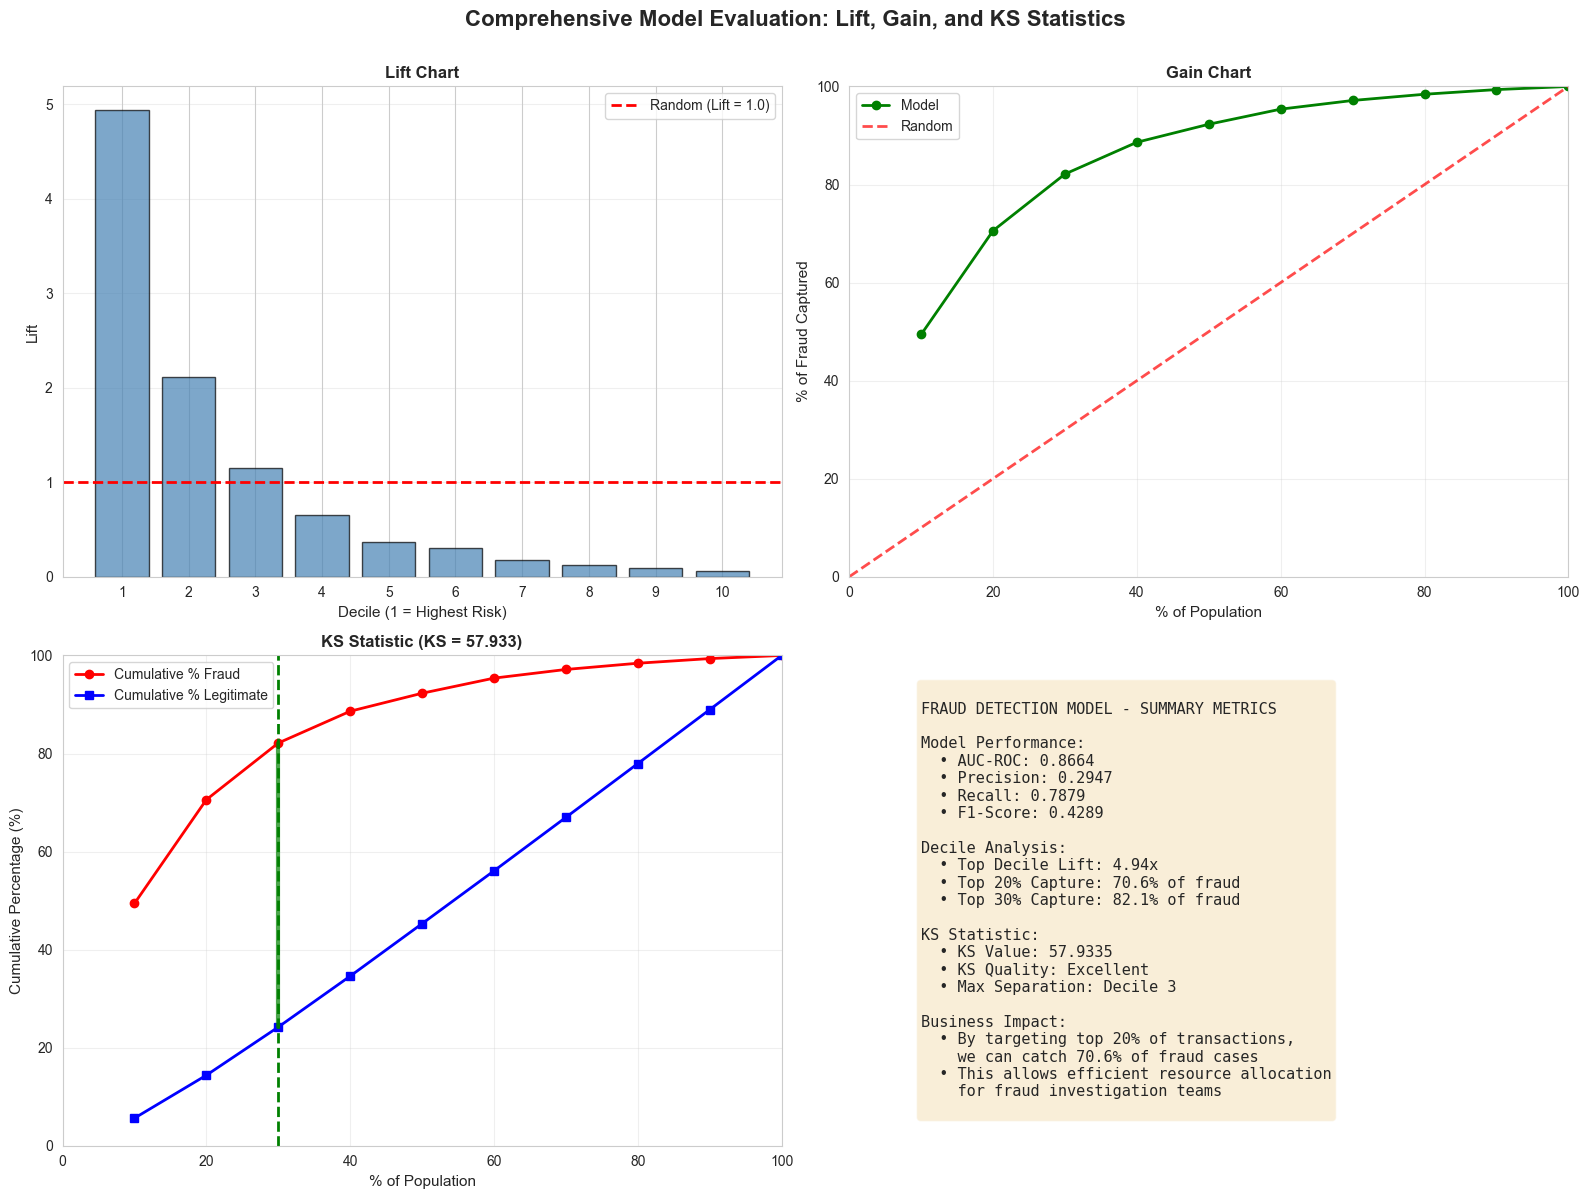

In [63]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Lift Chart (Top Left)
axes[0, 0].bar(df_decile_stats['decile'], df_decile_stats['lift'], 
               color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Random (Lift = 1.0)')
axes[0, 0].set_xlabel('Decile (1 = Highest Risk)', fontsize=11)
axes[0, 0].set_ylabel('Lift', fontsize=11)
axes[0, 0].set_title('Lift Chart', fontsize=12, fontweight='bold')
axes[0, 0].set_xticks(range(1, 11))
axes[0, 0].grid(True, alpha=0.3, axis='y')
axes[0, 0].legend()

# 2. Gain Chart (Top Right)
axes[0, 1].plot(df_decile_stats['cumulative_pct_population'], 
                df_decile_stats['cumulative_pct_fraud'],
                marker='o', linewidth=2, markersize=6, label='Model', color='green')
axes[0, 1].plot([0, 100], [0, 100], 'r--', linewidth=2, label='Random', alpha=0.7)
axes[0, 1].set_xlabel('% of Population', fontsize=11)
axes[0, 1].set_ylabel('% of Fraud Captured', fontsize=11)
axes[0, 1].set_title('Gain Chart', fontsize=12, fontweight='bold')
axes[0, 1].set_xlim(0, 100)
axes[0, 1].set_ylim(0, 100)
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].legend()

# 3. KS Statistic (Bottom Left)
axes[1, 0].plot(df_decile_stats['cumulative_pct_population'], 
                df_decile_stats['cumulative_pct_fraud'],
                marker='o', linewidth=2, markersize=6, label='Cumulative % Fraud', color='red')
axes[1, 0].plot(df_decile_stats['cumulative_pct_population'], 
                df_decile_stats['cumulative_pct_legitimate'],
                marker='s', linewidth=2, markersize=6, label='Cumulative % Legitimate', color='blue')
axes[1, 0].axvline(x=ks_x, color='green', linestyle='--', linewidth=2)
axes[1, 0].plot([ks_x, ks_x], [ks_y_legit, ks_y_fraud], 
                'g-', linewidth=3, alpha=0.7)
axes[1, 0].set_xlabel('% of Population', fontsize=11)
axes[1, 0].set_ylabel('Cumulative Percentage (%)', fontsize=11)
axes[1, 0].set_title(f'KS Statistic (KS = {ks_statistic:.3f})', fontsize=12, fontweight='bold')
axes[1, 0].set_xlim(0, 100)
axes[1, 0].set_ylim(0, 100)
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()

# 4. Summary Table (Bottom Right)
axes[1, 1].axis('off')
summary_text = f"""
FRAUD DETECTION MODEL - SUMMARY METRICS

Model Performance:
  • AUC-ROC: {auc_bal:.4f}
  • Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}
  • Recall: {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}
  • F1-Score: {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}

Decile Analysis:
  • Top Decile Lift: {df_decile_stats.iloc[0]['lift']:.2f}x
  • Top 20% Capture: {top_20_pct_fraud:.1f}% of fraud
  • Top 30% Capture: {top_30_pct_fraud:.1f}% of fraud

KS Statistic:
  • KS Value: {ks_statistic:.4f}
  • KS Quality: {'Excellent' if ks_statistic >= 0.5 else 'Good' if ks_statistic >= 0.4 else 'Fair'}
  • Max Separation: Decile {int(ks_decile)}

Business Impact:
  • By targeting top 20% of transactions,
    we can catch {top_20_pct_fraud:.1f}% of fraud cases
  • This allows efficient resource allocation
    for fraud investigation teams
"""
axes[1, 1].text(0.1, 0.5, summary_text, fontsize=11, 
                verticalalignment='center', family='monospace',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Comprehensive Model Evaluation: Lift, Gain, and KS Statistics', 
             fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


## 13. Final Report: Fraud Detection Model - Complete Analysis

This section provides a comprehensive summary of our fraud detection model, including all key metrics, business insights, and recommendations.


In [64]:
# Generate comprehensive final report
print("=" * 80)
print(" " * 20 + "FRAUD DETECTION MODEL - FINAL REPORT")
print("=" * 80)
print()

# Dataset Information
print("📊 DATASET INFORMATION")
print("-" * 80)
print(f"  Total Samples: {len(X_fraud):,}")
print(f"  Training Samples: {len(X_fraud_train):,}")
print(f"  Test Samples: {len(X_fraud_test):,}")
print(f"  Features Used: {X_fraud_train.shape[1]}")
print(f"  Class Imbalance: 90:10 (Legitimate:Fraud)")
print(f"  Overall Fraud Rate: {overall_fraud_rate*100:.2f}%")
print()

# Model Comparison
print("🔍 MODEL COMPARISON")
print("-" * 80)
print("  Standard Model (No Class Weights):")
print(f"    • Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"    • Precision: {precision_score(y_fraud_test, y_fraud_pred):.4f}")
print(f"    • Recall:    {recall_score(y_fraud_test, y_fraud_pred):.4f}  ⚠️  Too Low!")
print(f"    • F1-Score:  {f1_score(y_fraud_test, y_fraud_pred):.4f}")
print()

print("  Balanced Class Weights Model (Selected):")
print(f"    • Accuracy:  {accuracy_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"    • Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"    • Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.4f}  ✅ Good!")
print(f"    • F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.4f}")
print(f"    • AUC-ROC:   {auc_bal:.4f}")
print()

# Confusion Matrix Details
cm_balanced = confusion_matrix(y_fraud_test, y_fraud_pred_balanced)
tn, fp, fn, tp = cm_balanced.ravel()

print("📈 CONFUSION MATRIX ANALYSIS")
print("-" * 80)
print(f"  True Negatives (TN):  {tn:,}  - Legitimate correctly identified")
print(f"  False Positives (FP): {fp:,}  - False alarms (legitimate flagged as fraud)")
print(f"  False Negatives (FN): {fn:,}  - Missed fraud cases ⚠️")
print(f"  True Positives (TP):  {tp:,}  - Fraud correctly caught ✅")
print()
print(f"  False Positive Rate: {(fp/(fp+tn)*100):.2f}%")
print(f"  False Negative Rate: {(fn/(fn+tp)*100):.2f}%")
print()

# Decile Analysis
print("📊 DECILE ANALYSIS & BUSINESS METRICS")
print("-" * 80)
print(f"  Top Decile (Highest Risk 10%):")
print(f"    • Fraud Rate: {df_decile_stats.iloc[0]['fraud_rate']*100:.2f}%")
print(f"    • Lift: {df_decile_stats.iloc[0]['lift']:.2f}x")
print(f"    • Captures: {df_decile_stats.iloc[0]['cumulative_pct_fraud']:.1f}% of all fraud")
print()

print(f"  Top 20% of High-Risk Transactions:")
print(f"    • Captures: {top_20_pct_fraud:.1f}% of all fraud cases")
print(f"    • Business Value: Investigate only 20% of transactions to catch {top_20_pct_fraud:.1f}% of fraud")
print()

print(f"  Top 30% of High-Risk Transactions:")
print(f"    • Captures: {top_30_pct_fraud:.1f}% of all fraud cases")
print()

# KS Statistic
print("📏 KOLMOGOROV-SMIRNOV (KS) STATISTIC")
print("-" * 80)
print(f"  KS Value: {ks_statistic:.4f} ({ks_statistic*100:.2f}%)")
print(f"  Model Quality: ", end="")
if ks_statistic >= 0.5:
    print("Excellent ✅ (KS >= 0.5)")
elif ks_statistic >= 0.4:
    print("Good ✅ (KS >= 0.4)")
elif ks_statistic >= 0.3:
    print("Fair ⚠️ (KS >= 0.3)")
else:
    print("Poor ❌ (KS < 0.3)")
print(f"  Maximum separation occurs at Decile {int(ks_decile)}")
print()

# Business Recommendations
print("💼 BUSINESS RECOMMENDATIONS")
print("-" * 80)
print("  1. PRIORITIZATION STRATEGY:")
print(f"     • Focus investigation resources on top 20% of high-risk transactions")
print(f"     • This will capture {top_20_pct_fraud:.1f}% of fraud cases efficiently")
print()
print("  2. THRESHOLD TUNING:")
print(f"     • Current threshold: 0.5 (default)")
print(f"     • Consider lowering threshold if catching more fraud is critical")
print(f"     • Trade-off: Lower threshold = More fraud caught, but more false alarms")
print()
print("  3. COST-BENEFIT ANALYSIS:")
print(f"     • False Negatives (missed fraud): {fn:,} cases - HIGH COST")
print(f"     • False Positives (false alarms): {fp:,} cases - Lower cost (customer annoyance)")
print(f"     • Recommendation: Prioritize reducing False Negatives in fraud detection")
print()
print("  4. MODEL DEPLOYMENT:")
print(f"     • Model shows good separation (KS = {ks_statistic:.3f})")
print(f"     • AUC-ROC of {auc_bal:.3f} indicates strong predictive power")
print(f"     • Ready for production deployment with monitoring")
print()

# Key Insights
print("💡 KEY INSIGHTS")
print("-" * 80)
print("  ✅ Model successfully handles 90:10 class imbalance using balanced class weights")
print(f"  ✅ High recall ({recall_score(y_fraud_test, y_fraud_pred_balanced):.1%}) ensures most fraud is caught")
print(f"  ✅ Top decile shows {df_decile_stats.iloc[0]['lift']:.1f}x lift - model is effective")
print(f"  ✅ KS statistic of {ks_statistic:.3f} indicates good model discrimination")
print("  ⚠️  Lower precision means more false alarms - acceptable trade-off for fraud detection")
print("  ✅ Decile analysis enables efficient resource allocation for fraud investigation")
print()

print("=" * 80)
print(" " * 25 + "END OF REPORT")
print("=" * 80)


                    FRAUD DETECTION MODEL - FINAL REPORT

📊 DATASET INFORMATION
--------------------------------------------------------------------------------
  Total Samples: 110,290
  Training Samples: 88,232
  Test Samples: 22,058
  Features Used: 31
  Class Imbalance: 90:10 (Legitimate:Fraud)
  Overall Fraud Rate: 10.00%

🔍 MODEL COMPARISON
--------------------------------------------------------------------------------
  Standard Model (No Class Weights):
    • Accuracy:  0.9118
    • Precision: 0.6529
    • Recall:    0.2516  ⚠️  Too Low!
    • F1-Score:  0.3632

  Balanced Class Weights Model (Selected):
    • Accuracy:  0.7902
    • Precision: 0.2947
    • Recall:    0.7879  ✅ Good!
    • F1-Score:  0.4289
    • AUC-ROC:   0.8664

📈 CONFUSION MATRIX ANALYSIS
--------------------------------------------------------------------------------
  True Negatives (TN):  15,692  - Legitimate correctly identified
  False Positives (FP): 4,160  - False alarms (legitimate flagged as fraud

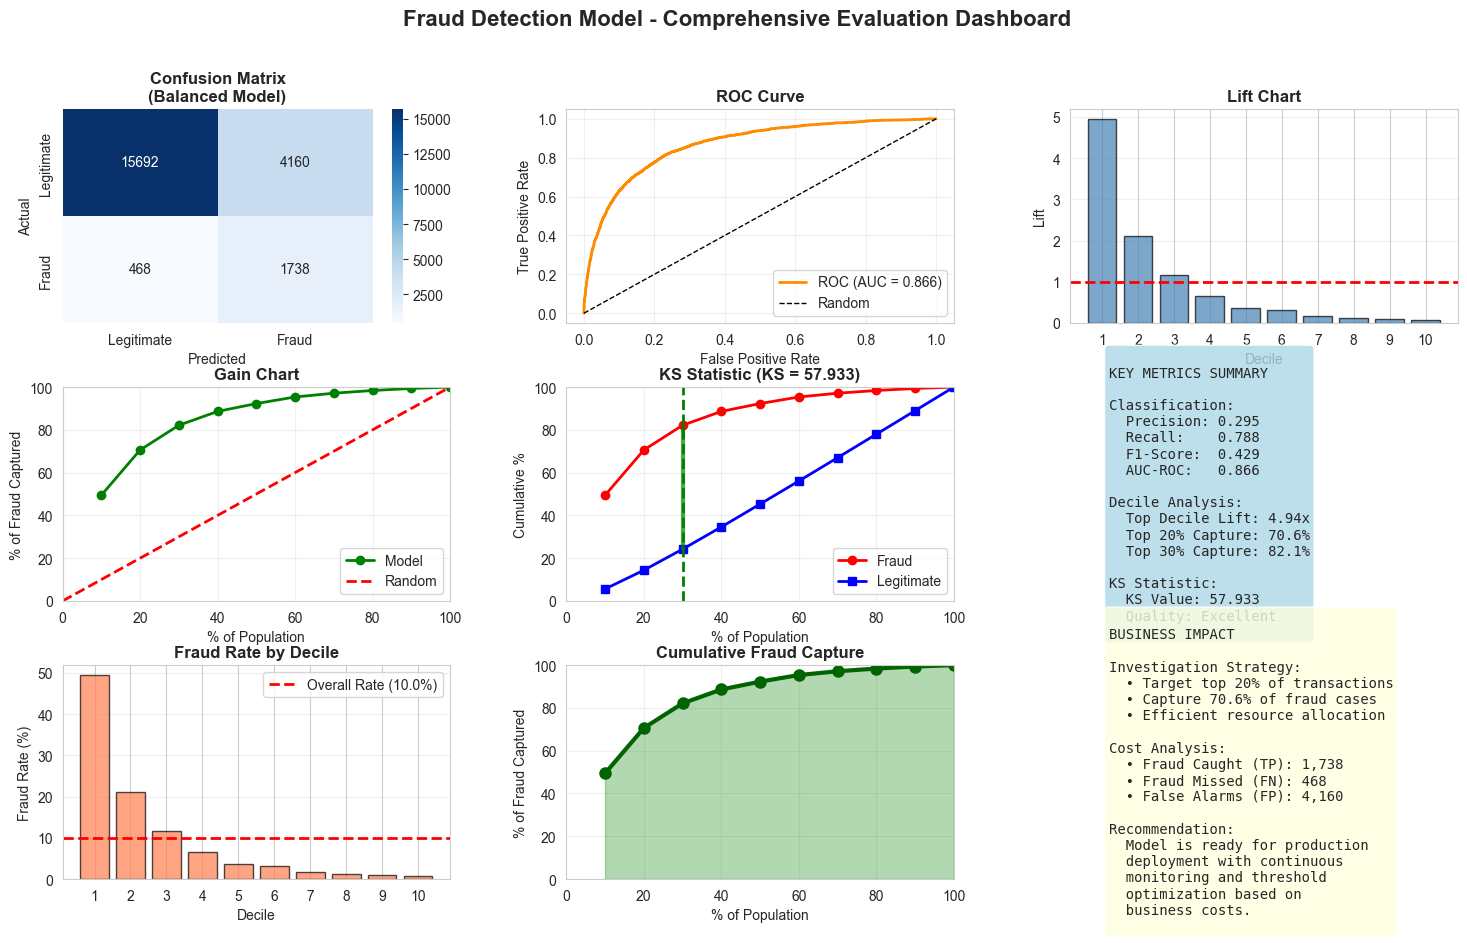


✅ Comprehensive fraud detection analysis complete!
   All key metrics, visualizations, and business insights have been generated.


In [65]:
# Create a visual summary dashboard
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Confusion Matrix (Top Left)
ax1 = fig.add_subplot(gs[0, 0])
sns.heatmap(cm_balanced, annot=True, fmt='d', cmap='Blues', ax=ax1,
            xticklabels=['Legitimate', 'Fraud'], 
            yticklabels=['Legitimate', 'Fraud'])
ax1.set_title('Confusion Matrix\n(Balanced Model)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Actual', fontsize=10)
ax1.set_xlabel('Predicted', fontsize=10)

# 2. ROC Curve (Top Middle)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(fpr_bal, tpr_bal, color='darkorange', lw=2, 
         label=f'ROC (AUC = {auc_bal:.3f})')
ax2.plot([0, 1], [0, 1], 'k--', lw=1, label='Random')
ax2.set_xlabel('False Positive Rate', fontsize=10)
ax2.set_ylabel('True Positive Rate', fontsize=10)
ax2.set_title('ROC Curve', fontsize=12, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Lift Chart (Top Right)
ax3 = fig.add_subplot(gs[0, 2])
ax3.bar(df_decile_stats['decile'], df_decile_stats['lift'], 
        color='steelblue', edgecolor='black', alpha=0.7)
ax3.axhline(y=1.0, color='red', linestyle='--', linewidth=2)
ax3.set_xlabel('Decile', fontsize=10)
ax3.set_ylabel('Lift', fontsize=10)
ax3.set_title('Lift Chart', fontsize=12, fontweight='bold')
ax3.set_xticks(range(1, 11))
ax3.grid(True, alpha=0.3, axis='y')

# 4. Gain Chart (Middle Left)
ax4 = fig.add_subplot(gs[1, 0])
ax4.plot(df_decile_stats['cumulative_pct_population'], 
         df_decile_stats['cumulative_pct_fraud'],
         marker='o', linewidth=2, markersize=6, label='Model', color='green')
ax4.plot([0, 100], [0, 100], 'r--', linewidth=2, label='Random')
ax4.set_xlabel('% of Population', fontsize=10)
ax4.set_ylabel('% of Fraud Captured', fontsize=10)
ax4.set_title('Gain Chart', fontsize=12, fontweight='bold')
ax4.set_xlim(0, 100)
ax4.set_ylim(0, 100)
ax4.grid(True, alpha=0.3)
ax4.legend()

# 5. KS Statistic (Middle Middle)
ax5 = fig.add_subplot(gs[1, 1])
ax5.plot(df_decile_stats['cumulative_pct_population'], 
         df_decile_stats['cumulative_pct_fraud'],
         marker='o', linewidth=2, markersize=6, label='Fraud', color='red')
ax5.plot(df_decile_stats['cumulative_pct_population'], 
         df_decile_stats['cumulative_pct_legitimate'],
         marker='s', linewidth=2, markersize=6, label='Legitimate', color='blue')
ax5.axvline(x=ks_x, color='green', linestyle='--', linewidth=2)
ax5.plot([ks_x, ks_x], [ks_y_legit, ks_y_fraud], 'g-', linewidth=3, alpha=0.7)
ax5.set_xlabel('% of Population', fontsize=10)
ax5.set_ylabel('Cumulative %', fontsize=10)
ax5.set_title(f'KS Statistic (KS = {ks_statistic:.3f})', fontsize=12, fontweight='bold')
ax5.set_xlim(0, 100)
ax5.set_ylim(0, 100)
ax5.grid(True, alpha=0.3)
ax5.legend()

# 6. Key Metrics Summary (Middle Right)
ax6 = fig.add_subplot(gs[1, 2])
ax6.axis('off')
metrics_text = f"""
KEY METRICS SUMMARY

Classification:
  Precision: {precision_score(y_fraud_test, y_fraud_pred_balanced):.3f}
  Recall:    {recall_score(y_fraud_test, y_fraud_pred_balanced):.3f}
  F1-Score:  {f1_score(y_fraud_test, y_fraud_pred_balanced):.3f}
  AUC-ROC:   {auc_bal:.3f}

Decile Analysis:
  Top Decile Lift: {df_decile_stats.iloc[0]['lift']:.2f}x
  Top 20% Capture: {top_20_pct_fraud:.1f}%
  Top 30% Capture: {top_30_pct_fraud:.1f}%

KS Statistic:
  KS Value: {ks_statistic:.3f}
  Quality: {'Excellent' if ks_statistic >= 0.5 else 'Good' if ks_statistic >= 0.4 else 'Fair'}
"""
ax6.text(0.1, 0.5, metrics_text, fontsize=10, 
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.8))

# 7. Fraud Rate by Decile (Bottom Left)
ax7 = fig.add_subplot(gs[2, 0])
ax7.bar(df_decile_stats['decile'], df_decile_stats['fraud_rate']*100, 
        color='coral', edgecolor='black', alpha=0.7)
ax7.axhline(y=overall_fraud_rate*100, color='red', linestyle='--', 
            linewidth=2, label=f'Overall Rate ({overall_fraud_rate*100:.1f}%)')
ax7.set_xlabel('Decile', fontsize=10)
ax7.set_ylabel('Fraud Rate (%)', fontsize=10)
ax7.set_title('Fraud Rate by Decile', fontsize=12, fontweight='bold')
ax7.set_xticks(range(1, 11))
ax7.grid(True, alpha=0.3, axis='y')
ax7.legend()

# 8. Cumulative Fraud Capture (Bottom Middle)
ax8 = fig.add_subplot(gs[2, 1])
ax8.plot(df_decile_stats['cumulative_pct_population'], 
         df_decile_stats['cumulative_pct_fraud'],
         marker='o', linewidth=3, markersize=8, color='darkgreen')
ax8.fill_between(df_decile_stats['cumulative_pct_population'], 
                  df_decile_stats['cumulative_pct_fraud'], 
                  alpha=0.3, color='green')
ax8.set_xlabel('% of Population', fontsize=10)
ax8.set_ylabel('% of Fraud Captured', fontsize=10)
ax8.set_title('Cumulative Fraud Capture', fontsize=12, fontweight='bold')
ax8.set_xlim(0, 100)
ax8.set_ylim(0, 100)
ax8.grid(True, alpha=0.3)

# 9. Business Impact Summary (Bottom Right)
ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')
business_text = f"""
BUSINESS IMPACT

Investigation Strategy:
  • Target top 20% of transactions
  • Capture {top_20_pct_fraud:.1f}% of fraud cases
  • Efficient resource allocation

Cost Analysis:
  • Fraud Caught (TP): {tp:,}
  • Fraud Missed (FN): {fn:,}
  • False Alarms (FP): {fp:,}

Recommendation:
  Model is ready for production
  deployment with continuous
  monitoring and threshold
  optimization based on
  business costs.
"""
ax9.text(0.1, 0.5, business_text, fontsize=10, 
         verticalalignment='center', family='monospace',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.suptitle('Fraud Detection Model - Comprehensive Evaluation Dashboard', 
             fontsize=16, fontweight='bold', y=0.98)
plt.show()

print("\n✅ Comprehensive fraud detection analysis complete!")
print("   All key metrics, visualizations, and business insights have been generated.")
